### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from sklearn.metrics import f1_score
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset, get_X_y_data
from evaluate_utils import evaluate_model_cm, evaluate_model_score

### Load necessary data

In [2]:
# specify results directory
results_dir = pathlib.Path("evaluations/")
results_dir.mkdir(parents=True, exist_ok=True)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate best model

In [3]:
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Evaluate with training data

In [4]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
training_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,MetaphaseAlignment,11,572.214286,58.185714,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.048350,-0.721622,0.749788,-1.377590,0.454974,0.188488,0.141427,-1.553405,2.346107,-1.774278
1,Artefact,66,1117.070423,342.732394,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.172767,-0.290257,-0.709041,-1.431541,-0.063308,-0.412793,0.452684,-1.906647,1.962141,-0.223039
2,Artefact,66,1116.500000,362.000000,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,1.093582,-0.323180,-0.663069,-1.427502,-0.901764,-0.355080,0.418053,-2.298449,1.098266,-0.069326
3,Artefact,66,1106.348485,370.469697,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,0.943948,-0.211267,-0.346355,-1.365543,-0.276932,0.023856,0.376514,-1.700348,1.833686,-0.625385
4,MetaphaseAlignment,98,937.692308,521.048077,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,...,0.947300,-0.564136,0.333336,-1.584454,0.891666,1.223252,-0.359166,-0.826366,2.115734,-1.241848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,SmallIrregular,160,1105.826923,536.173077,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,-0.397249,-0.565566,-0.588207,-0.944316,1.137498,-0.536326,-1.618058,0.579486,-1.083401,1.938486
4647,SmallIrregular,170,1082.461538,553.169231,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,-0.295010,0.310557,0.524240,-1.558440,-0.013856,-0.466041,-3.544024,0.174894,-0.085268,1.764378
4648,SmallIrregular,175,1065.846154,570.123077,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,-0.691697,0.809051,-0.522286,-0.956816,0.112946,-0.087137,-1.078033,0.191389,-0.921300,1.250694
4650,SmallIrregular,194,323.269231,622.641026,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,...,1.127832,0.492408,-0.531921,-0.766331,0.286463,0.493081,0.520599,-0.713538,0.553553,0.480614


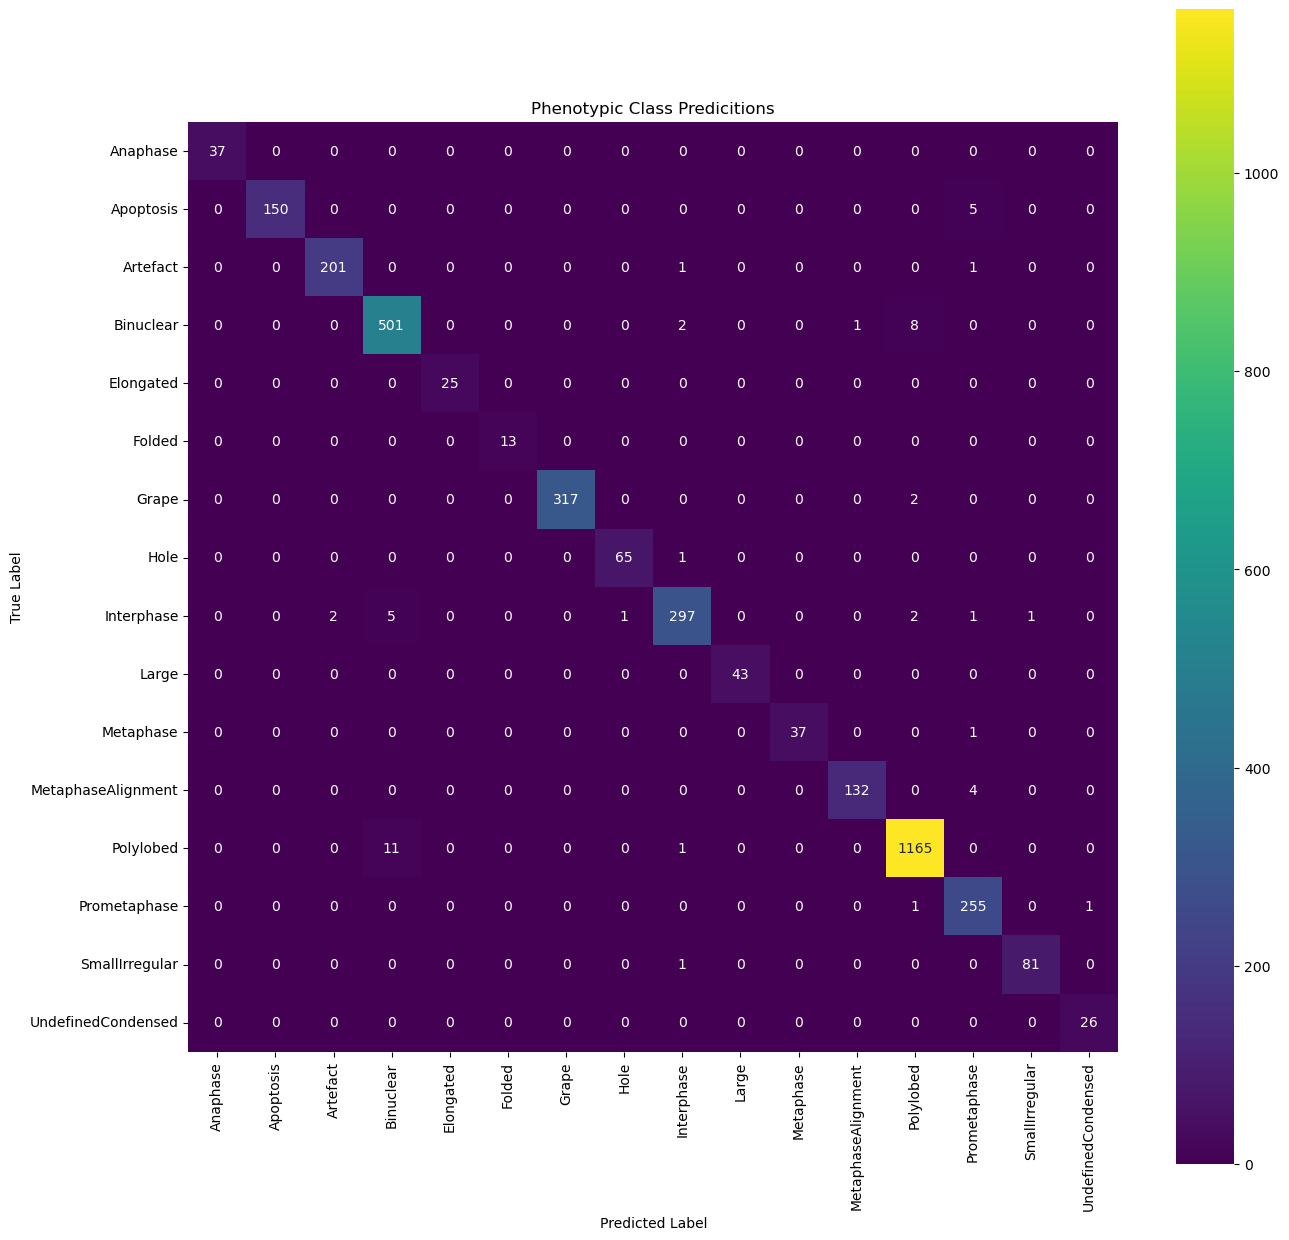

In [5]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

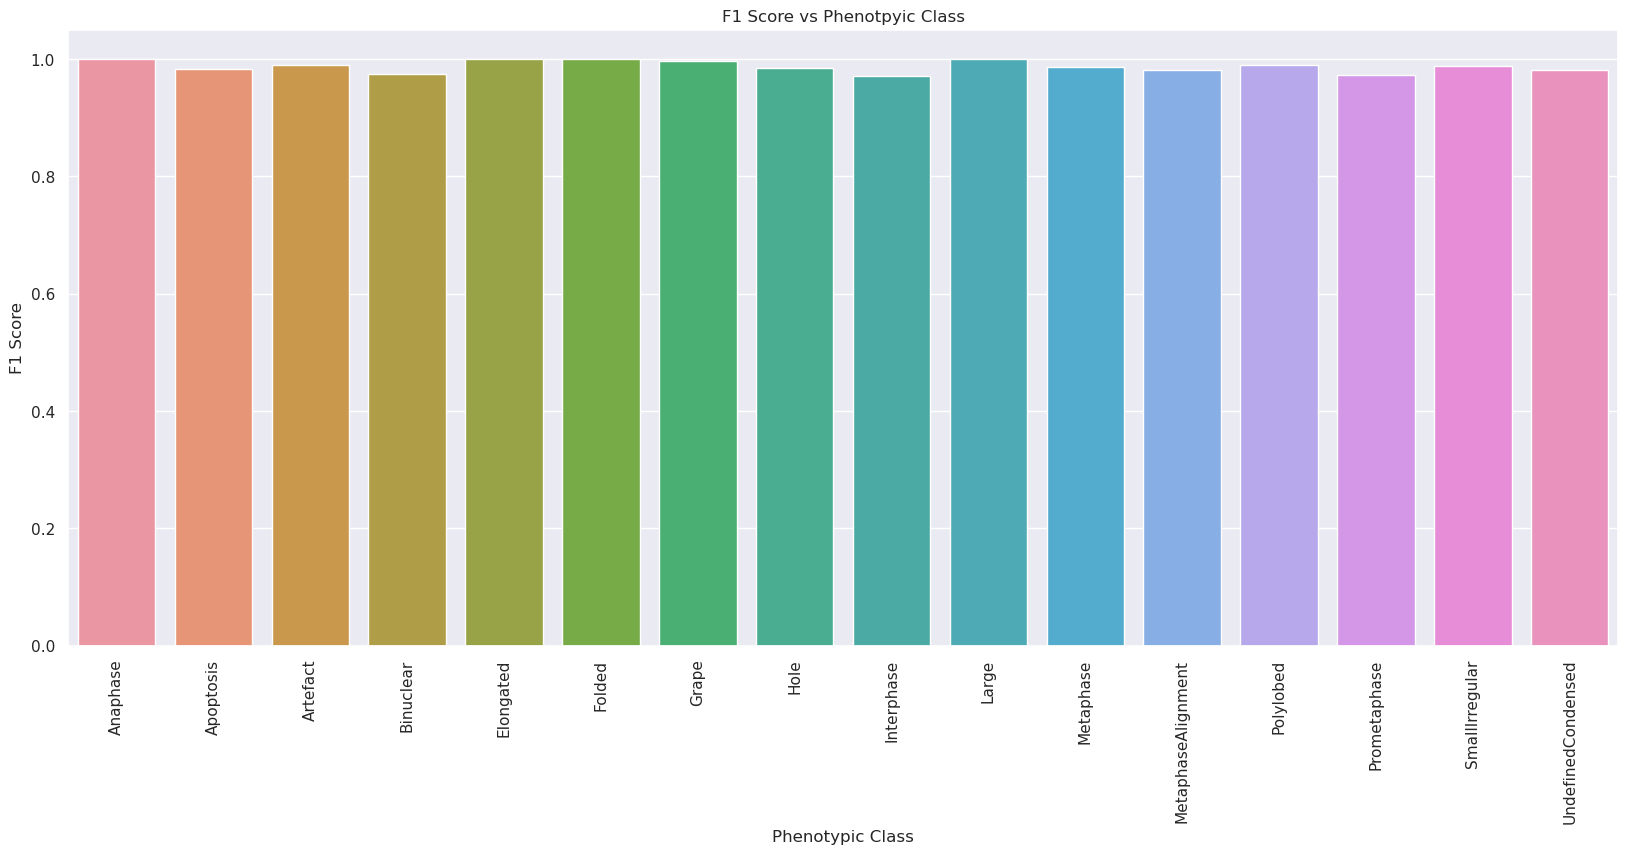

In [6]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [7]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
3735,Anaphase,296,553.963636,955.818182,LT0043_48,166,36,1,LT0043_48_166,LT0043_48/LT0043_48_166_36.tif,...,1.462225,-0.616369,-0.531454,-1.440759,-0.084943,1.122296,0.536537,-0.670603,2.340016,-0.063247
1938,Anaphase,191,108.709091,810.927273,LT0027_44,292,95,1,LT0027_44_292,LT0027_44/LT0027_44_292_95.tif,...,0.929248,3.647632,-0.114033,-0.869640,1.028330,2.456478,-1.666183,0.174904,0.183448,1.116518
861,Anaphase,95,1067.354839,604.629032,LT0048_14,335,1,1,LT0048_14_335,LT0048_14/LT0048_14_335_1.tif,...,1.111943,0.418418,-0.964839,-1.614682,5.774443,-0.975210,-1.797358,-1.633382,0.516337,-1.135858
1266,Anaphase,32,909.931034,99.413793,LT0098_13,21,77,1,LT0098_13_21,LT0098_13/LT0098_13_21_77.tif,...,0.401601,1.268759,-0.465424,0.169212,0.117011,2.817199,-0.689718,-0.522147,0.739060,-1.661322
1003,Anaphase,103,1101.338983,292.186441,LT0100_03,93,84,1,LT0100_03_93,LT0100_03/LT0100_03_93_84.tif,...,0.423295,-0.076668,0.132334,-0.510567,-0.349815,0.662900,0.766846,-0.050815,1.494643,0.513932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,SmallIrregular,93,979.030769,553.276923,LT0094_01,319,60,1,LT0094_01_319,LT0094_01/LT0094_01_319_60.tif,...,0.141835,0.496487,-0.754865,-0.662246,0.823577,0.594171,-0.585857,0.273909,0.048165,0.719115
1912,UndefinedCondensed,48,621.619565,230.152174,LT0027_44,292,92,1,LT0027_44_292,LT0027_44/LT0027_44_292_92.tif,...,1.137367,1.936749,1.337562,-0.866048,-0.327555,0.137286,0.744572,-0.552244,1.728855,-0.621845
1244,UndefinedCondensed,75,690.226415,280.264151,LT0041_32,132,65,1,LT0041_32_132,LT0041_32/LT0041_32_132_65.tif,...,1.074309,1.111121,0.266230,-0.587265,0.999843,0.766380,0.460926,-0.107652,1.563349,0.345567
1885,UndefinedCondensed,126,698.066667,765.213333,LT0027_44,292,65,1,LT0027_44_292,LT0027_44/LT0027_44_292_65.tif,...,0.737519,1.469439,1.067551,-0.988590,1.185334,1.174448,-0.712216,-0.740500,1.937956,-2.176477


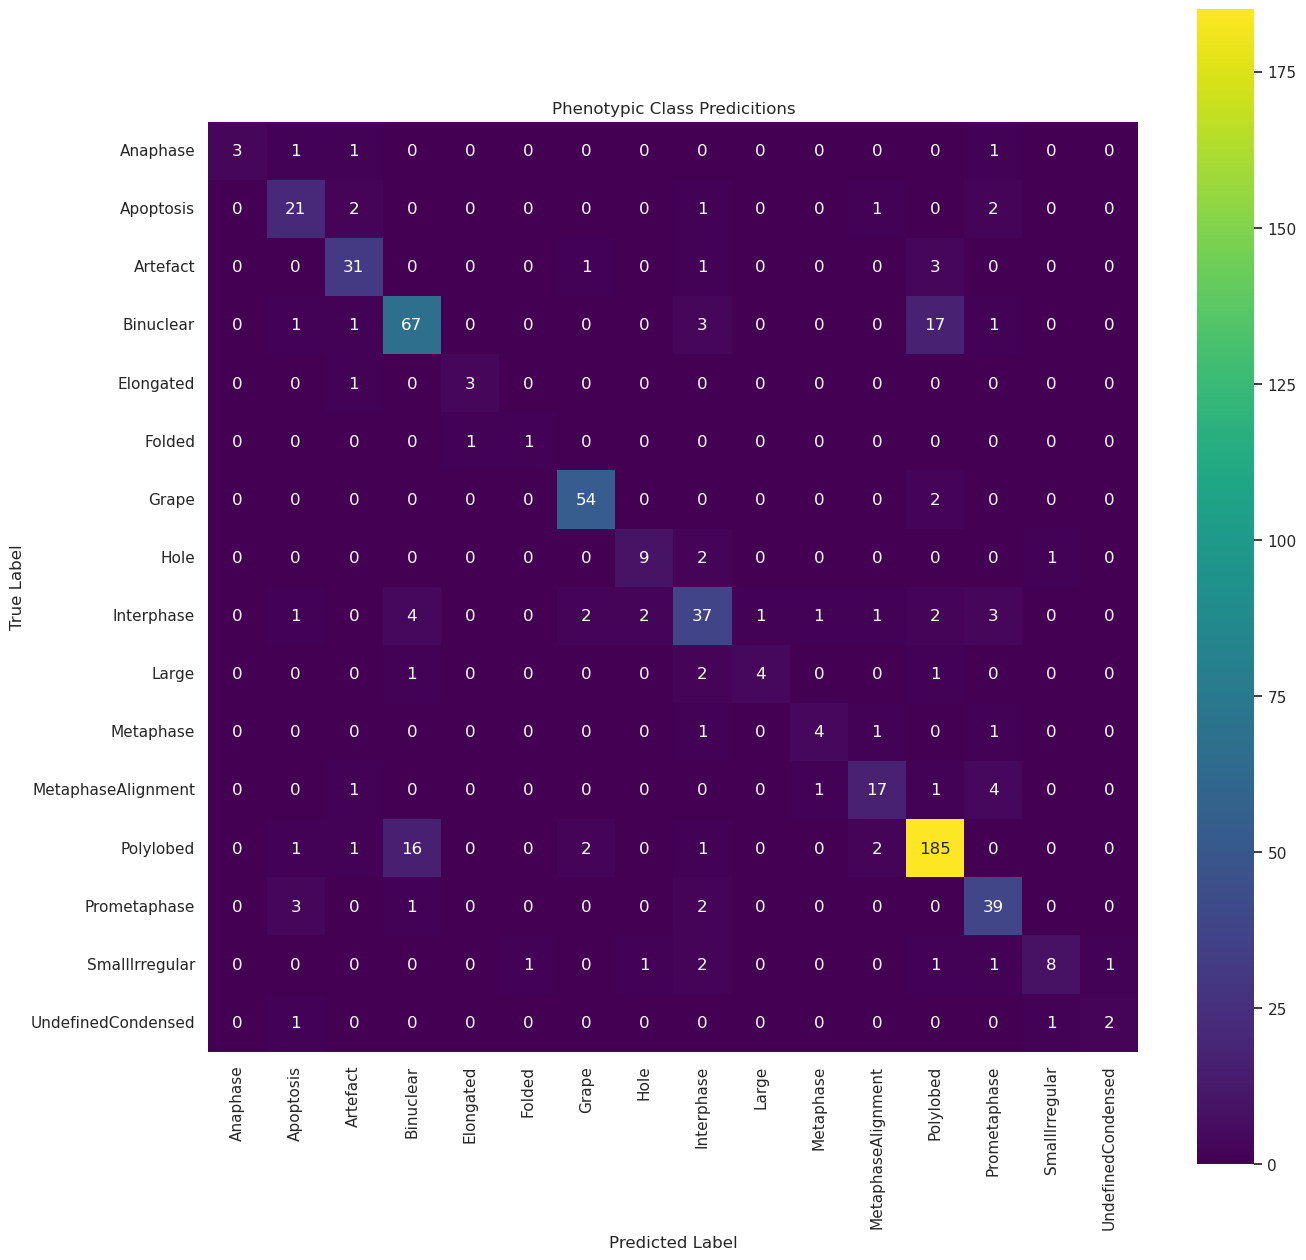

In [8]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

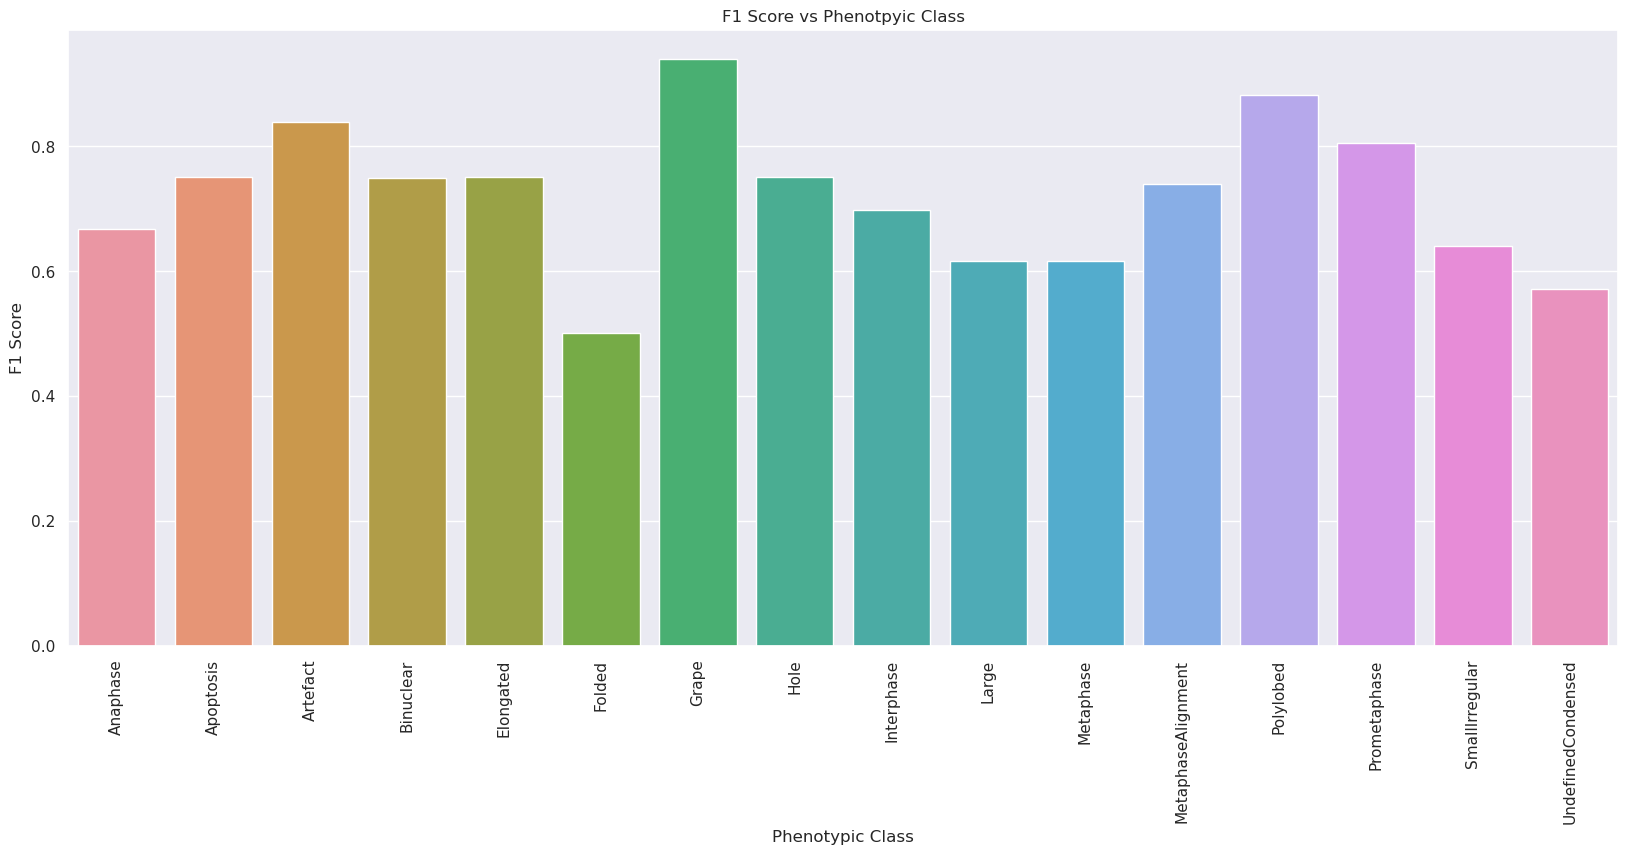

In [9]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [10]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
3291,Prometaphase,44,689.846154,395.230769,LT0064_14,3,22,1,LT0064_14_3,LT0064_14/LT0064_14_3_22.tif,...,0.736642,-0.445215,-0.265348,1.071087,0.218429,1.898012,0.610592,-0.385365,1.464963,-0.312188
3292,Prometaphase,84,593.157895,686.333333,LT0064_14,3,22,1,LT0064_14_3,LT0064_14/LT0064_14_3_22.tif,...,0.995399,0.249642,-0.018367,-1.448828,-0.108095,2.250121,-0.114802,-0.816467,2.097812,-0.739505
3293,Prometaphase,85,541.015873,691.968254,LT0064_14,3,22,1,LT0064_14_3,LT0064_14/LT0064_14_3_22.tif,...,1.308651,0.418540,-0.601356,-1.432083,-0.305420,4.157056,0.277327,-0.861576,0.808444,-0.388083
3294,Prometaphase,86,482.838235,697.647059,LT0064_14,3,22,1,LT0064_14_3,LT0064_14/LT0064_14_3_22.tif,...,1.689349,0.191744,0.316645,-1.242803,1.226191,3.854381,-0.198574,0.205935,1.721441,-1.363270
3295,Prometaphase,88,608.475410,720.688525,LT0064_14,3,22,1,LT0064_14_3,LT0064_14/LT0064_14_3_22.tif,...,0.693373,0.102049,0.672704,-1.385639,-0.001937,1.760955,0.095366,-0.617366,2.316967,-0.068435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Folded,95,706.580000,835.860000,LT0138_03,127,35,1,LT0138_03_127,LT0138_03/LT0138_03_127_35.tif,...,0.477016,-0.853186,-0.190448,-1.310051,0.905157,1.072310,-0.121663,0.484607,0.499503,-0.828424
2228,SmallIrregular,87,1260.900000,333.675000,LT0039_45,136,62,1,LT0039_45_136,LT0039_45/LT0039_45_136_62.tif,...,0.673718,0.277680,0.095618,0.041264,-0.449543,-1.188860,0.380463,0.079736,0.245942,0.793815
2229,SmallIrregular,152,467.472973,598.716216,LT0039_45,136,62,1,LT0039_45_136,LT0039_45/LT0039_45_136_62.tif,...,0.439038,-0.218860,0.184120,0.124753,-0.716705,-0.394543,-1.442362,0.072097,0.352796,1.657756
2230,SmallIrregular,159,499.466667,622.613333,LT0039_45,136,62,1,LT0039_45_136,LT0039_45/LT0039_45_136_62.tif,...,-1.269705,-0.449638,0.516888,0.145913,-0.175916,-0.139407,-1.648394,-1.174195,-0.724752,1.740923


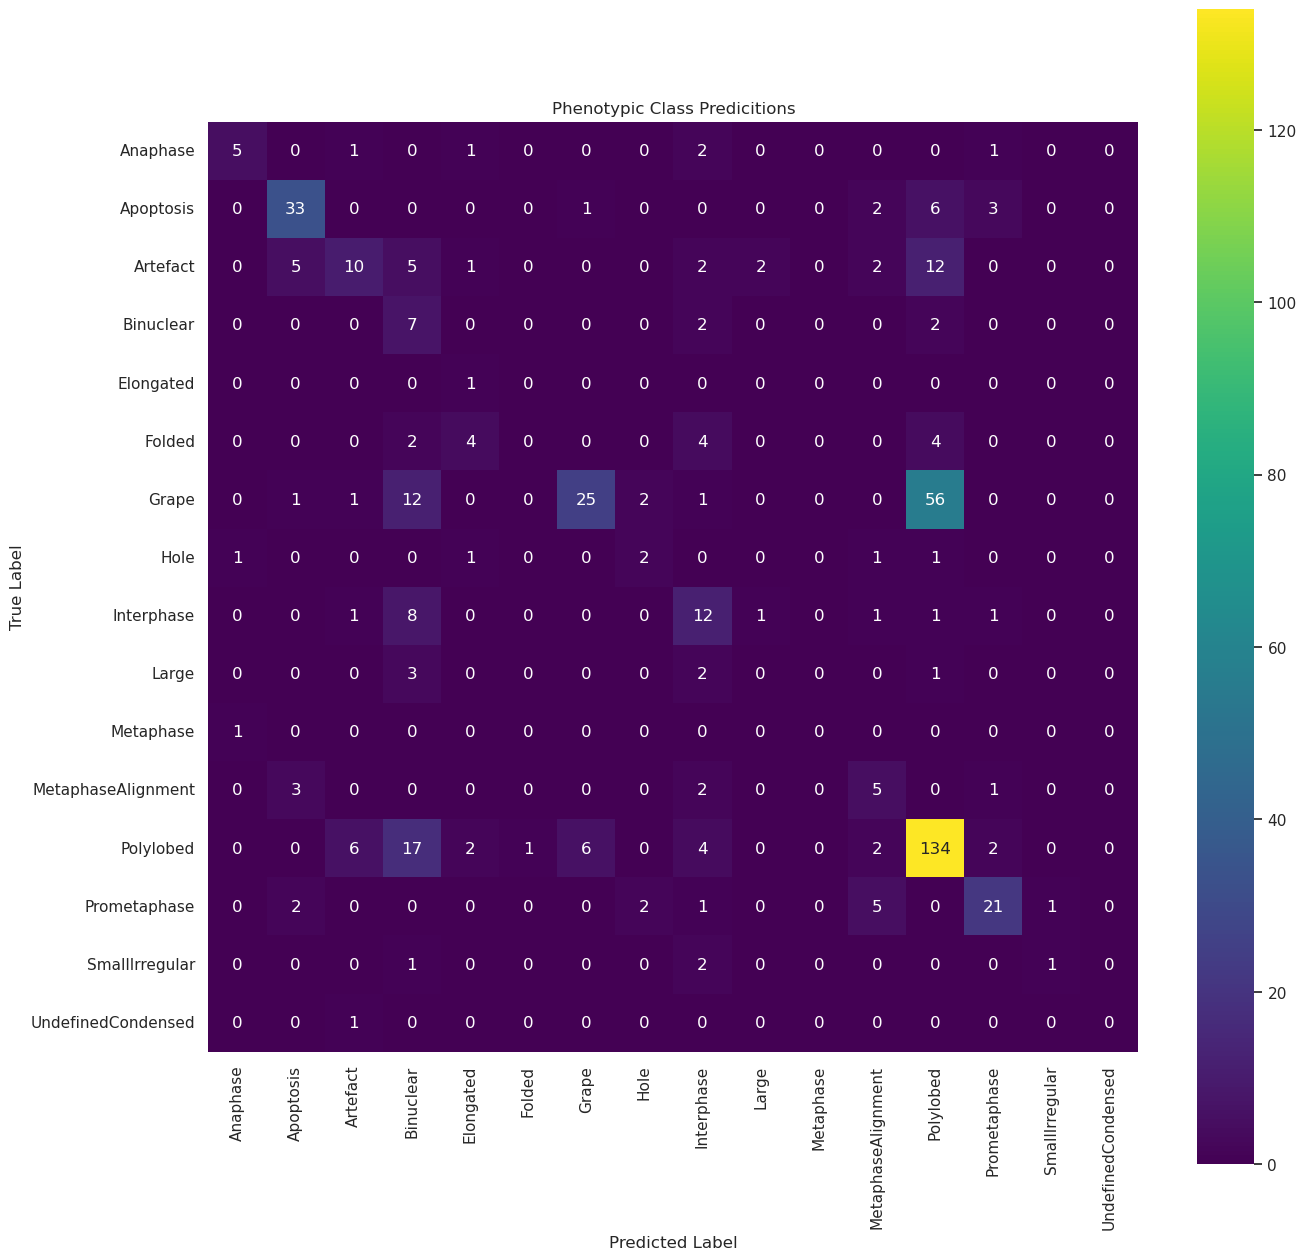

In [11]:
y_holdout, y_holdout_pred = evaluate_model_cm(log_reg_model, holdout_data)

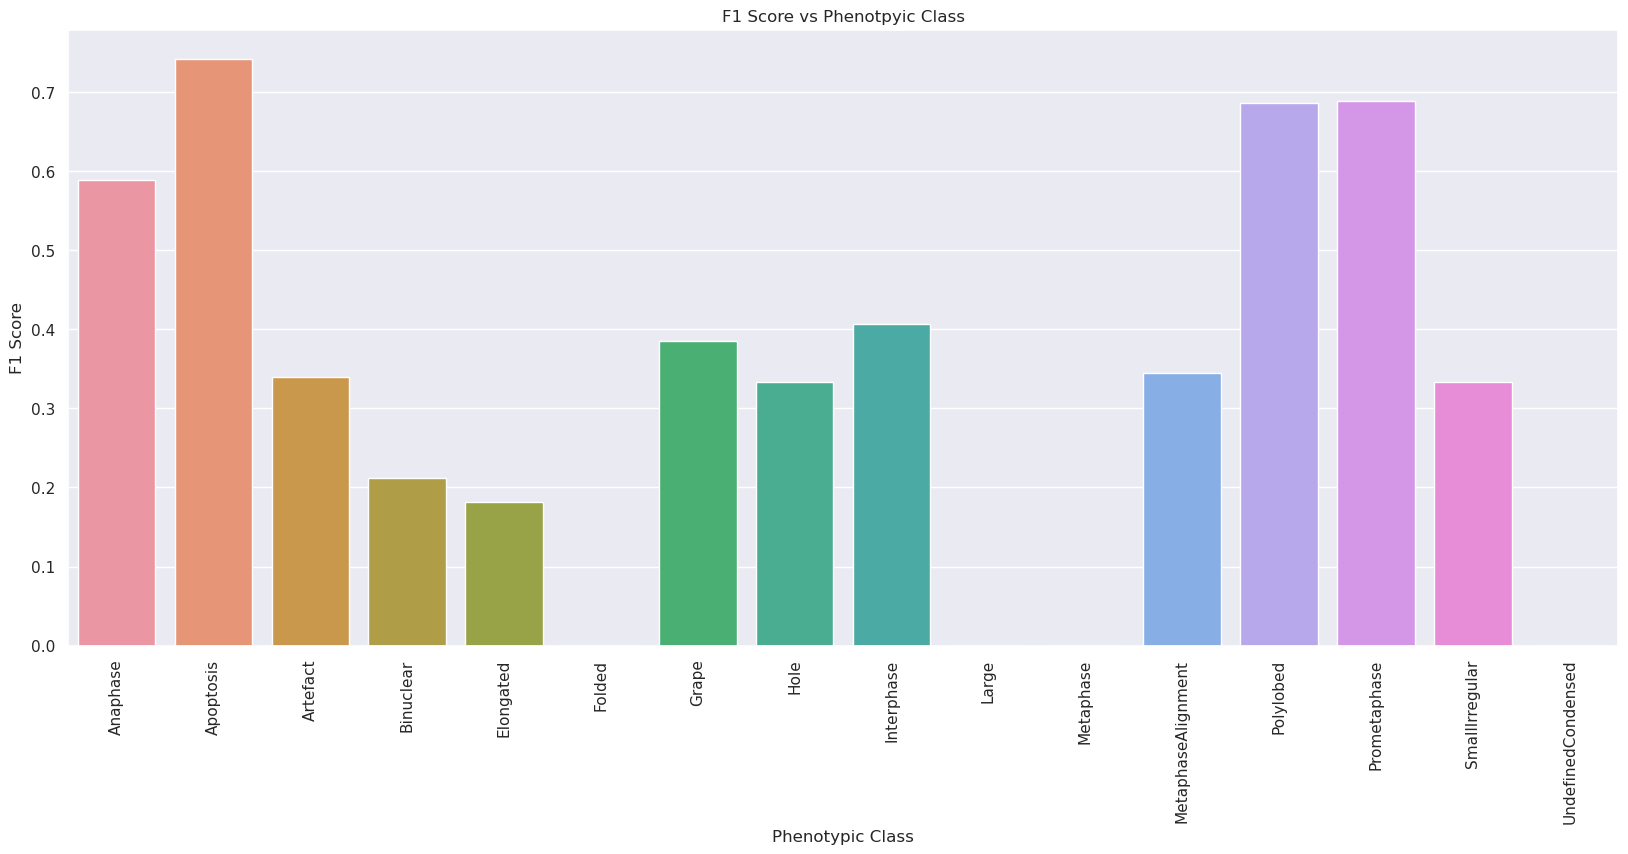

In [12]:
evaluate_model_score(log_reg_model, holdout_data)

### Save trained model predicitions

In [13]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [14]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

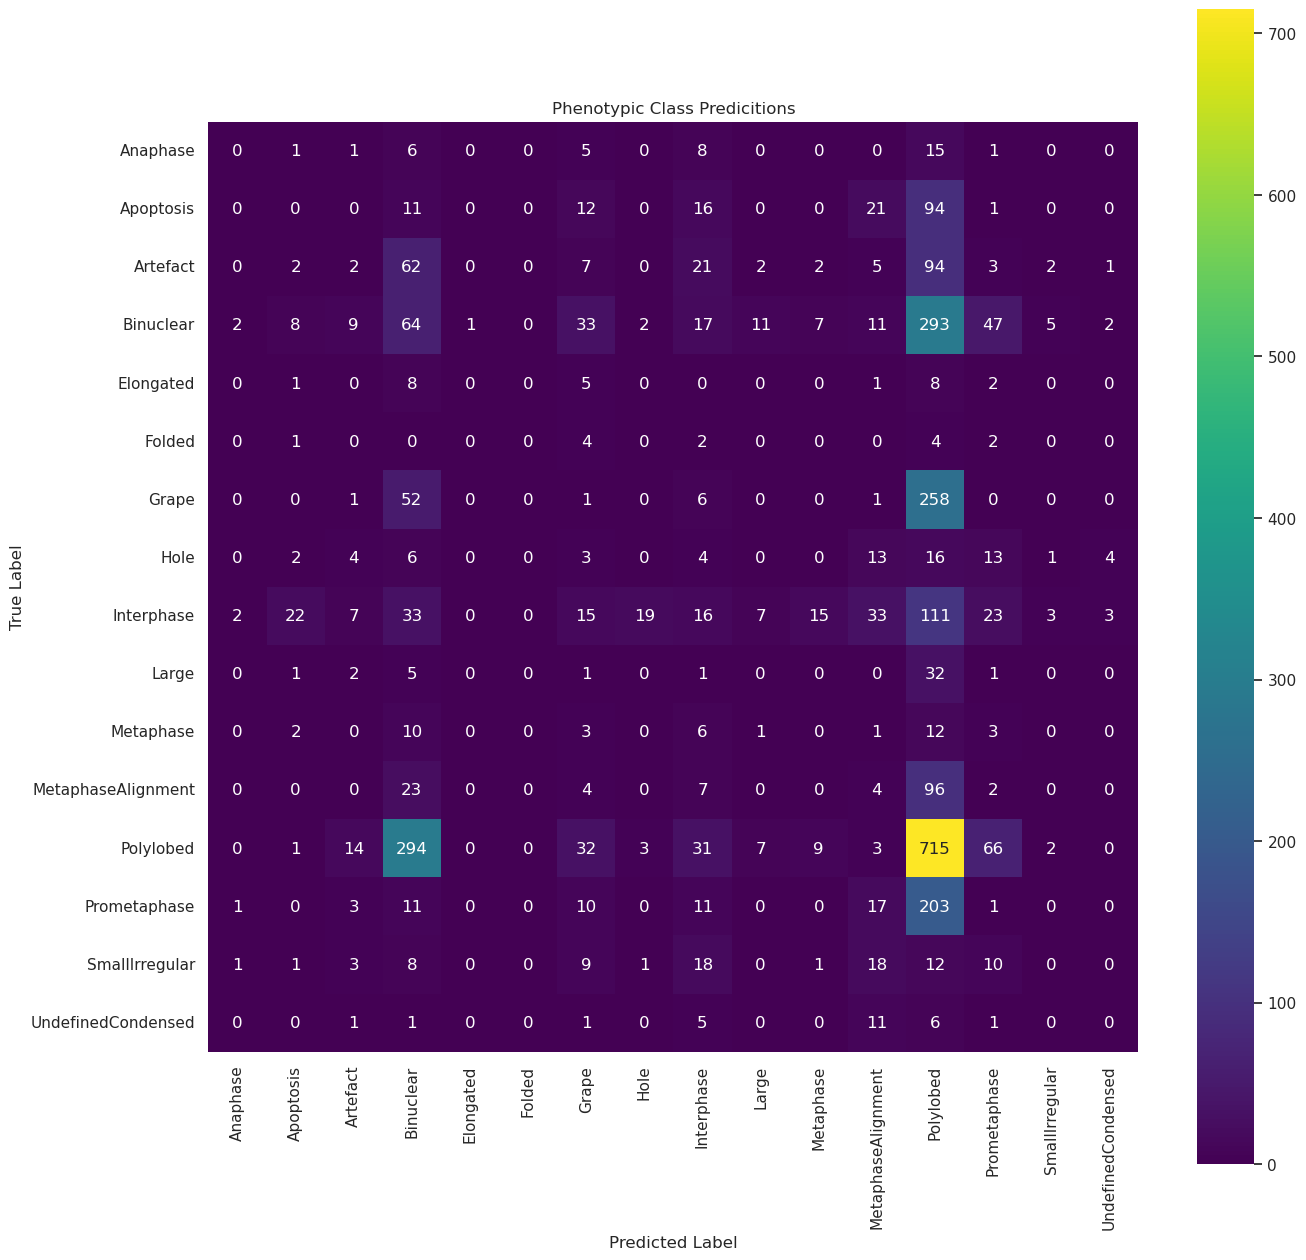

In [15]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

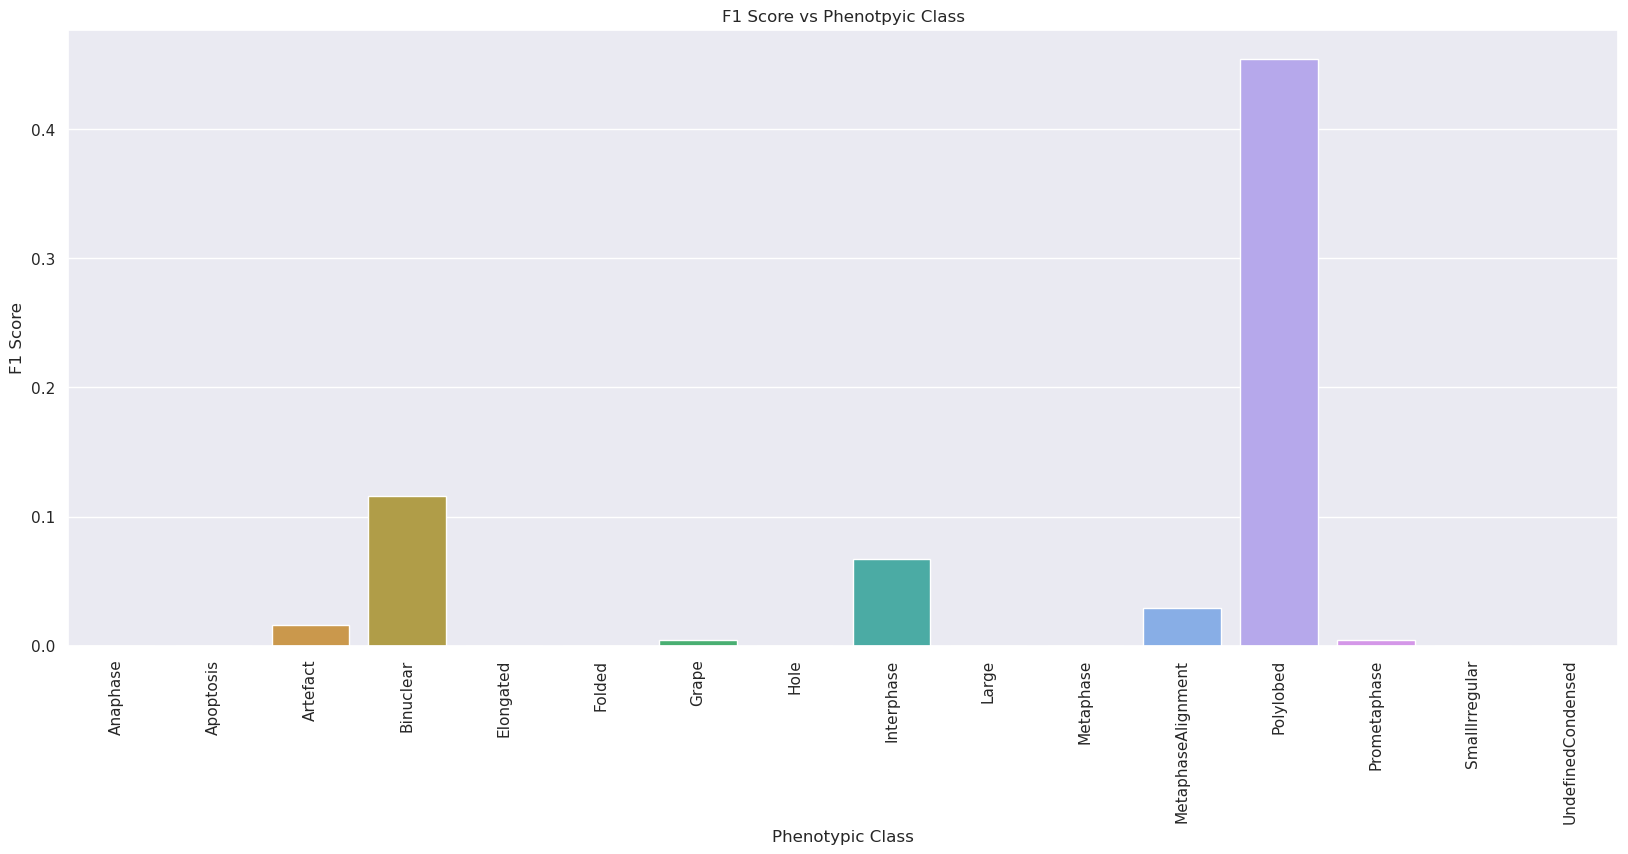

In [16]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

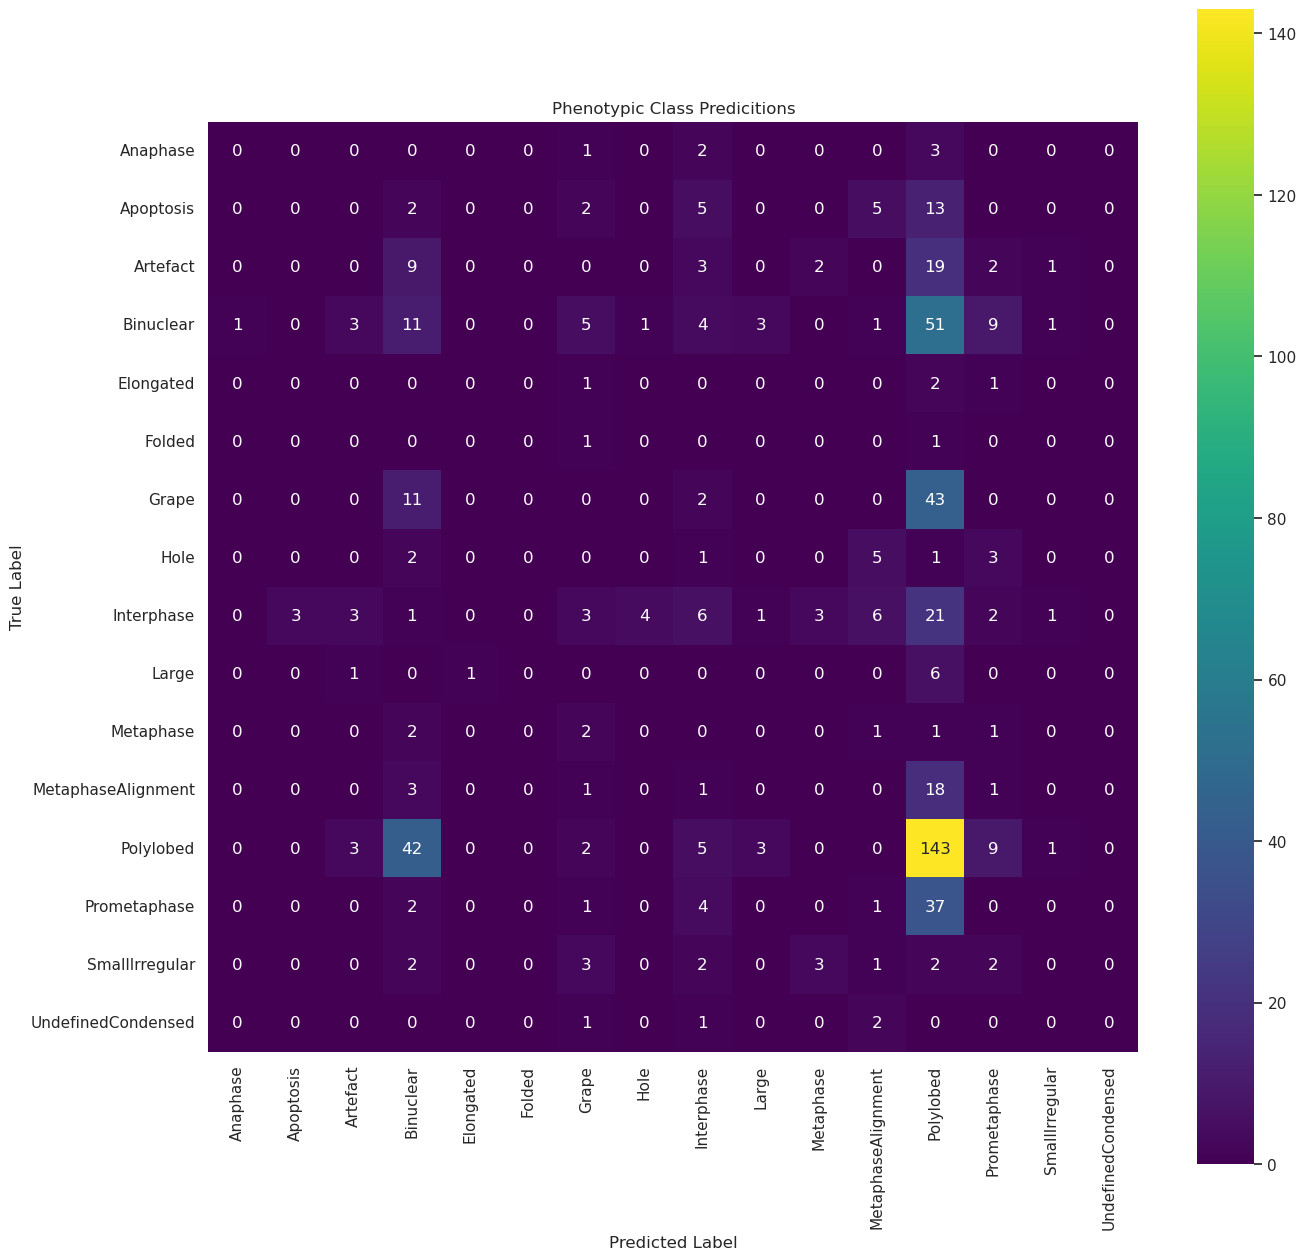

In [17]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

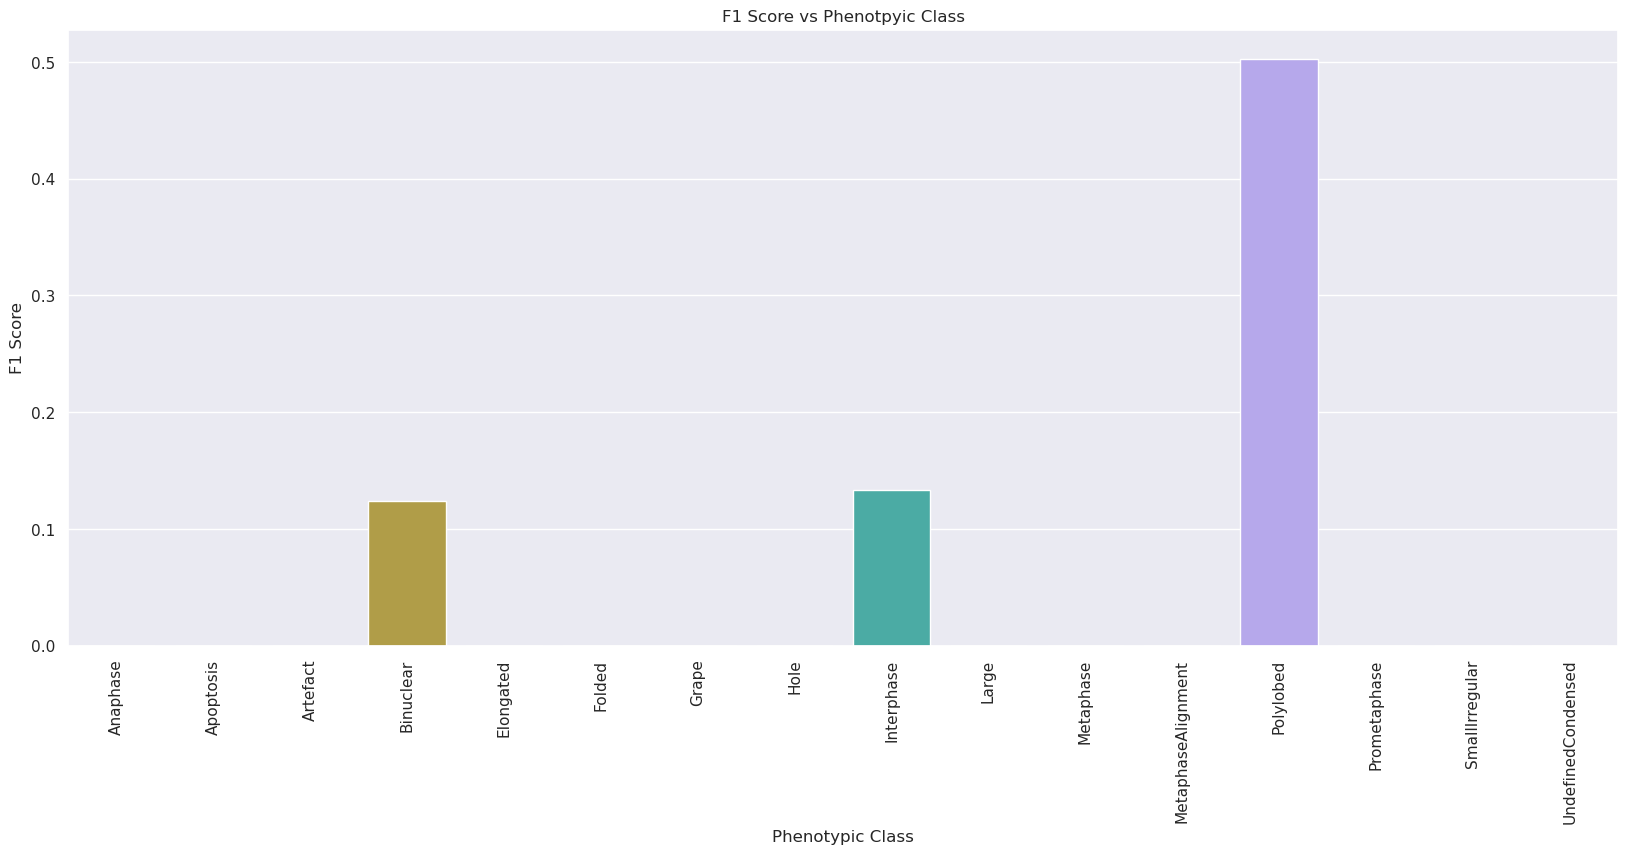

In [18]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Evaluate with holdout data

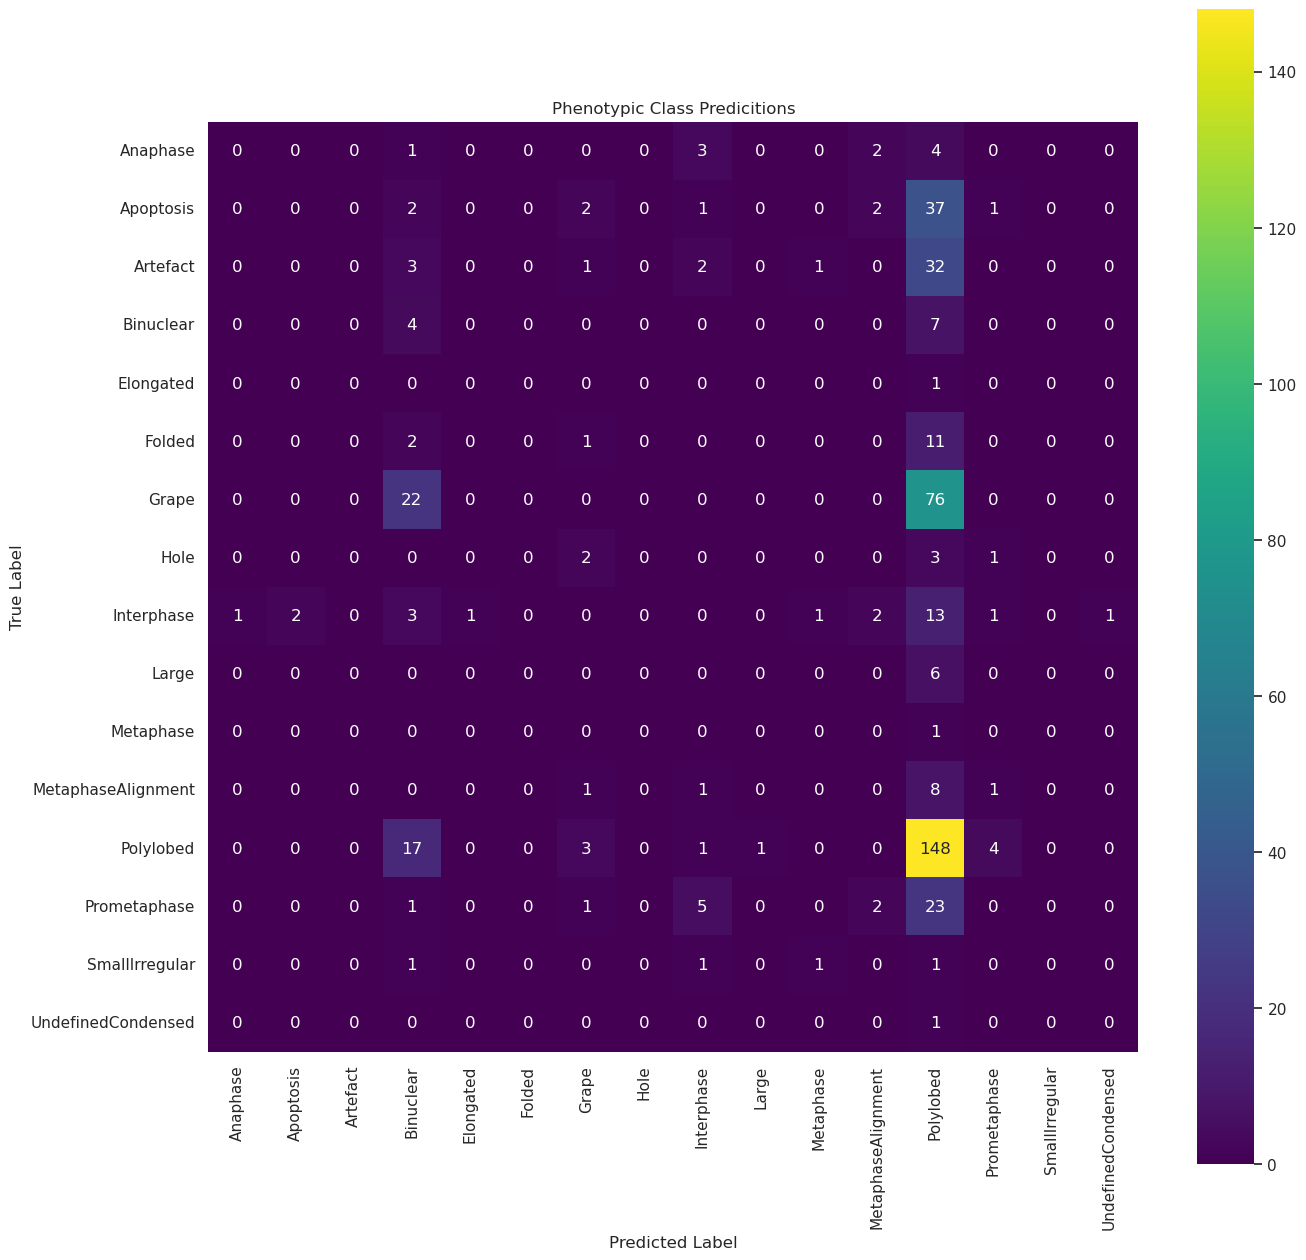

In [19]:
y_holdout, y_holdout_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, holdout_data)

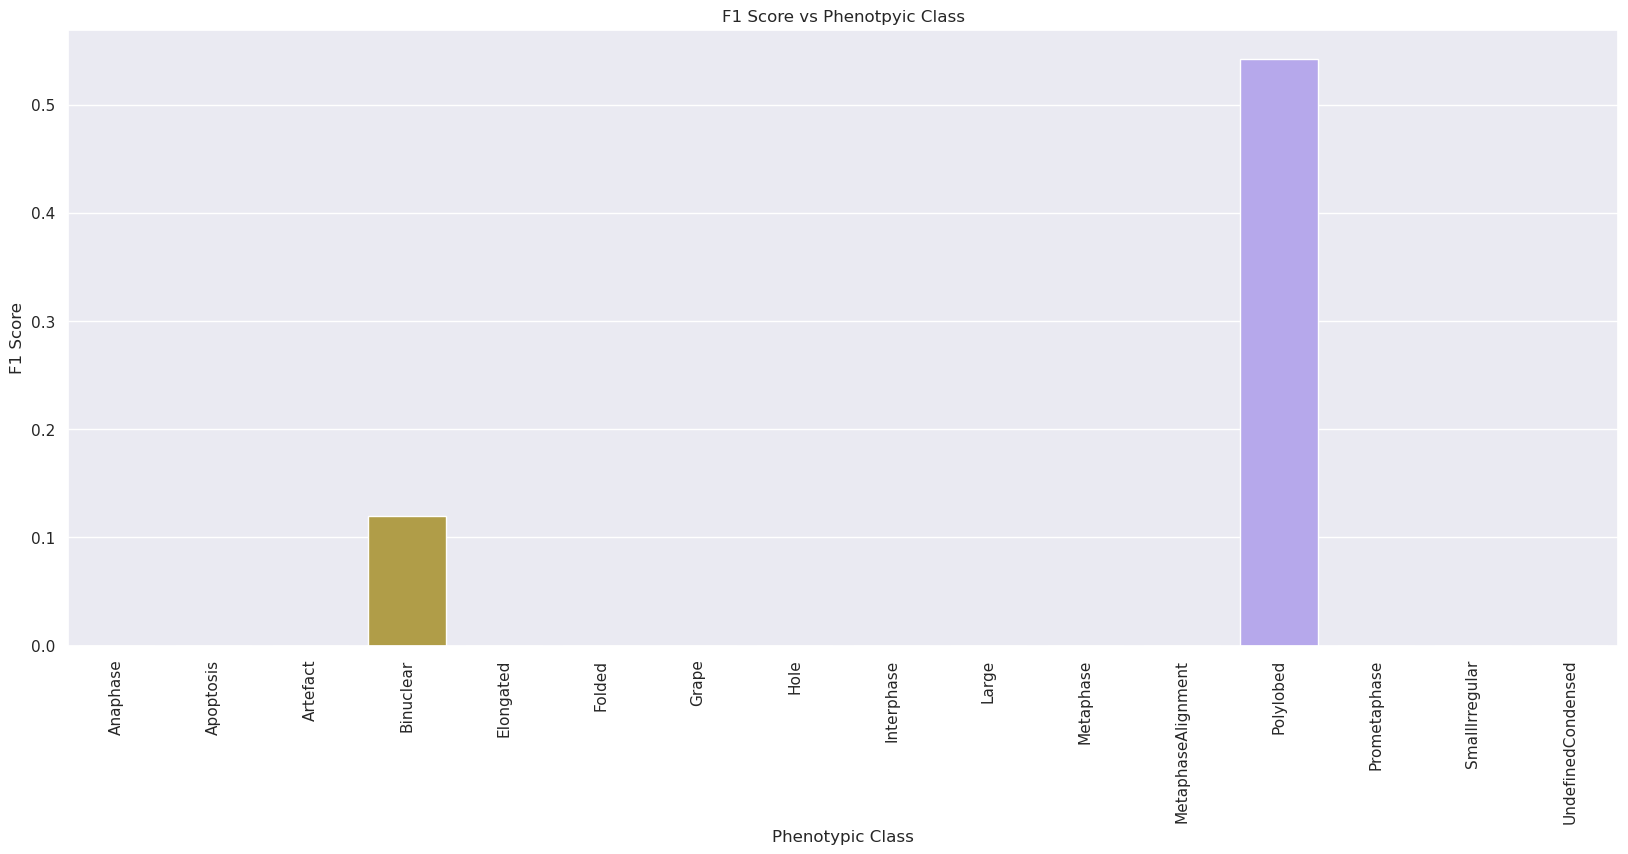

In [20]:
evaluate_model_score(shuffled_baseline_log_reg_model, holdout_data)

### Save trained model predicitions

In [21]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/shuffled_baseline_model_predictions.tsv", sep="\t")